In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Exercise - Investigate High Paying Skills

### Question
In our project we want to analyze salary data. Here's what we'll be focusing on:

- Visualize for highest paying skills
- Visualize for highest demanded skills

In [9]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [10]:
df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782637,Data Analyst,Data Integration Analyst,"Germantown, WI",via ZipRecruiter,Full-time,False,"Illinois, United States",2023-01-20 06:18:43,True,False,United States,year,70000.0,NaN,Virtual Benefits Administrator,"[vba, sql, sql server]","{'databases': ['sql server'], 'programming': [..."
782798,Data Analyst,Reference Data Analyst,"New York, NY",via Ai-Jobs.net,Full-time,False,"New York, United States",2023-04-21 05:59:51,True,False,United States,year,111175.0,NaN,DRW,[terminal],{'other': ['terminal']}
783588,Data Analyst,Data Analytics Manager,"Chicago, IL",via Ladders,Full-time,False,"Illinois, United States",2023-01-09 06:01:18,False,False,United States,year,125000.0,NaN,"United Air Lines, Inc","[sql, r, python, hadoop, excel]","{'analyst_tools': ['excel'], 'libraries': ['ha..."
783866,Data Analyst,Lead Credit Bureau Data Analyst,"Des Plaines, IL",via Ladders,Full-time,False,"Illinois, United States",2023-06-02 06:02:06,False,True,United States,year,115000.0,NaN,Discover Financial Services,[unix],{'os': ['unix']}


In [11]:
#Explode out the skills column.
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US['job_skills']

109        python
109             r
109       alteryx
109       tableau
180         excel
           ...   
784882        sql
784882        vba
784882    tableau
784882      excel
784882    alteryx
Name: job_skills, Length: 17440, dtype: object

In [12]:
#Explode out the skills column.
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [13]:
df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

,count,median
job_skills,,
airflow,44,116250.00
airtable,5,90000.00
alteryx,106,106281.25
angular,8,107500.00
ansible,1,159640.00
...,...,...
wire,4,74250.00
word,461,81194.75
workfront,3,75000.00


In [14]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

In [15]:
#Get the highest paying skills (order by highest to lowest).
df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [18]:
#Match up the highest count (demand) of skills and highest median salary by skill for data analyst roles.
df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10)

df_DA_skills

,count,median
job_skills,,
sql,2508,91000.00
excel,1808,84392.00
python,1431,97500.00
tableau,1364,92875.00
sas,926,90000.00
r,893,92500.00
power bi,838,90000.00
powerpoint,462,85000.00
word,461,81194.75


<Axes: ylabel='job_skills'>

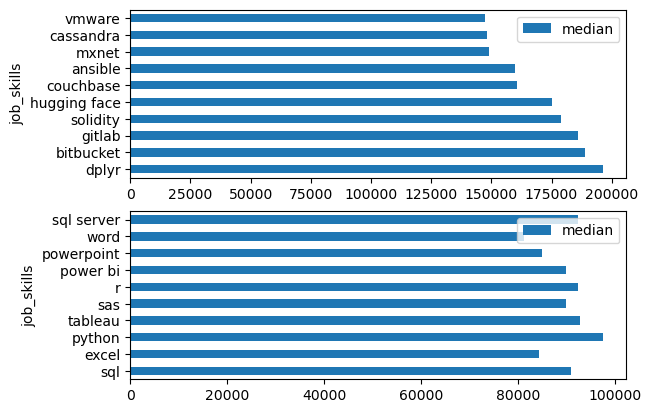

In [19]:
#Let's plot these next to each other using subplots().

#Since we are using two plots on this, we need to run that subplots function
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
df_DA_top_pay.plot(kind='barh', y='median', ax=ax[0]) 

# Top 10 Most In-Demand Skills for Data Analysts
df_DA_skills.plot(kind='barh', y='median', ax=ax[1])


In [ ]:
#To fix the order issue in the chart, we also need to sort df_DA_skills by median
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)
df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

<Axes: ylabel='job_skills'>

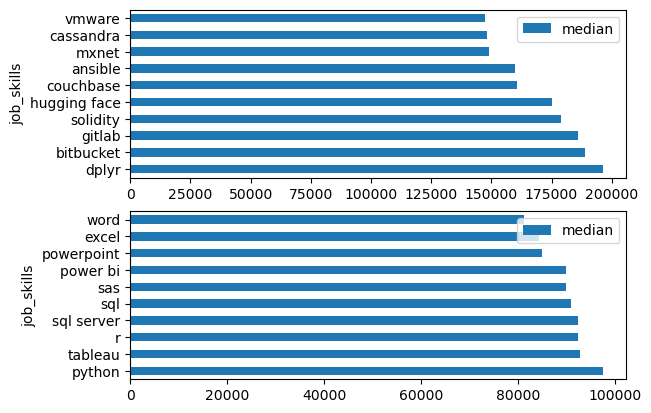

In [21]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
df_DA_top_pay.plot(kind='barh', y='median', ax=ax[0]) 

# Top 10 Most In-Demand Skills for Data Analysts
df_DA_skills.plot(kind='barh', y='median', ax=ax[1])

<Axes: ylabel='job_skills'>

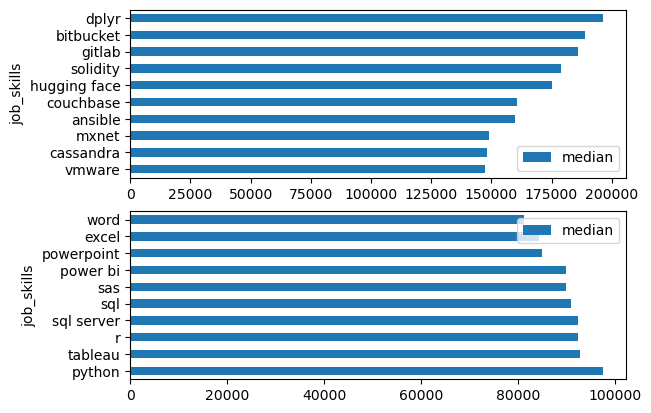

In [22]:
#To fix the order, we could use
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
df_DA_top_pay.plot(kind='barh', y='median', ax=ax[0]) 
ax[0].invert_yaxis()

# Top 10 Most In-Demand Skills for Data Analysts
df_DA_skills.plot(kind='barh', y='median', ax=ax[1])

<Axes: ylabel='job_skills'>

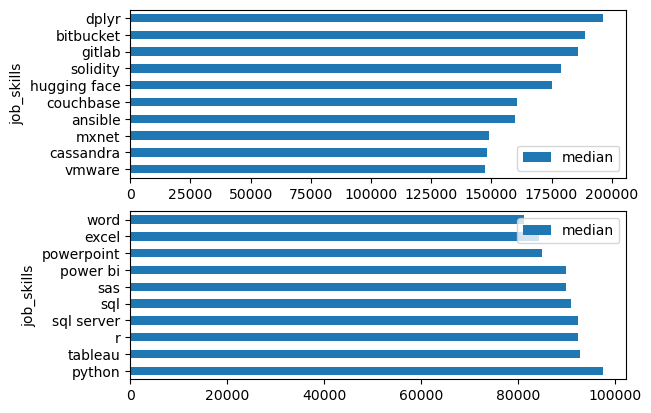

In [23]:
#An alternate method to call the df in reverse order
fig, ax = plt.subplots(2, 1)  

#To do this, we use [::-1] because the last value in this is the step value, and we are sayong plot it in reverse

# Top 10 Highest Paid Skills for Data Analysts
df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0]) 

# Top 10 Most In-Demand Skills for Data Analysts
df_DA_skills.plot(kind='barh', y='median', ax=ax[1])

(0.0, 206062.5)

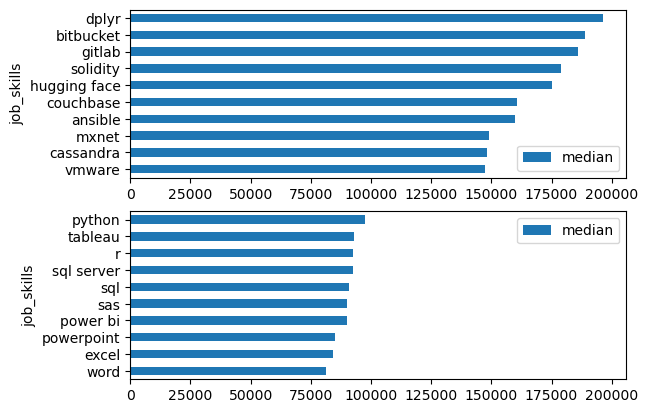

In [24]:
#Aligning the x-axis
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0]) 

# Top 10 Most In-Demand Skills for Data Analysts
df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1])
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot


(0.0, 206062.5)

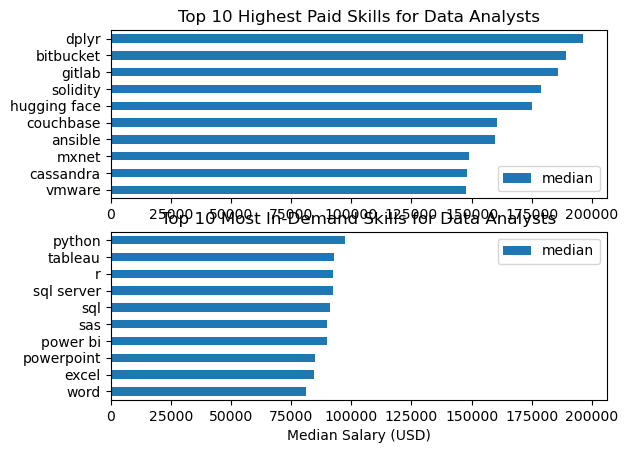

In [26]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0]) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')


# Top 10 Most In-Demand Skills for Data Analysts
df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1])
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim()) 

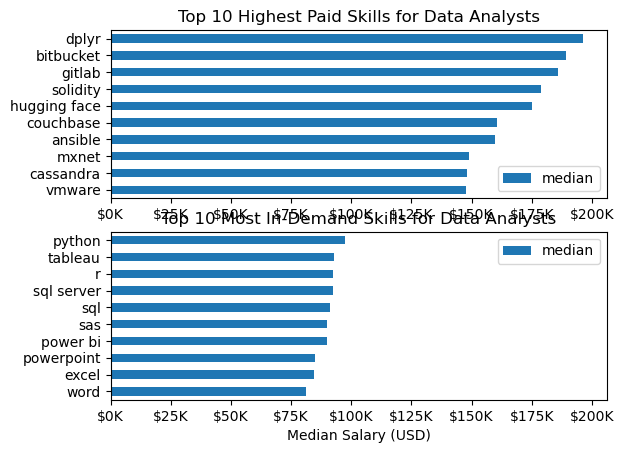

In [27]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0]) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Top 10 Most In-Demand Skills for Data Analysts
df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1])
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim()) 
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

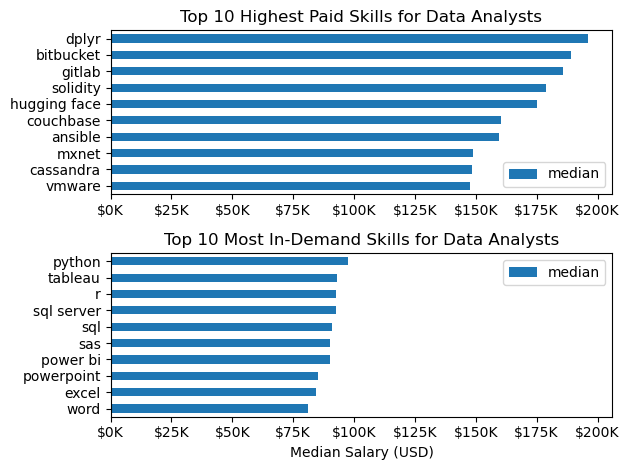

In [28]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0]) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Top 10 Most In-Demand Skills for Data Analysts
df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1])
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim()) 
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()


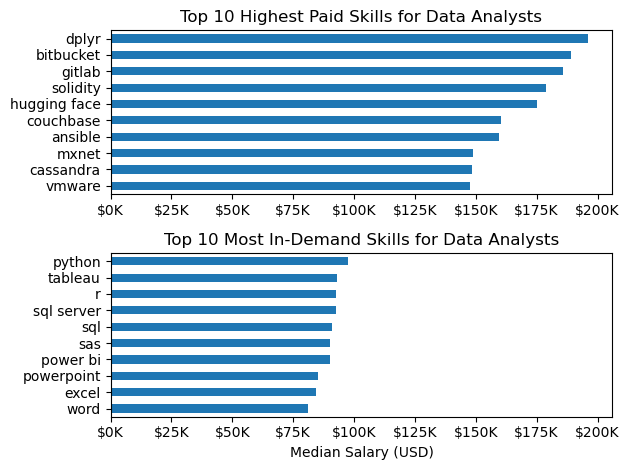

In [29]:
#Remove the legend

fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Top 10 Most In-Demand Skills for Data Analysts
df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim()) 
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()